## Rolling Circle Filter (RCF)

In [37]:
%matplotlib inline

import os
import sys
notebook_path = os.path.abspath('.')
sources_path = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.insert(0, sources_path)

from cellmincer.opto_utils import rolling_circle_filter

import matplotlib.pylab as plt
import numpy as np
from time import time
import torch
import logging
import json
import pprint
import pickle

device = torch.device("cuda")
dtype = torch.float32

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

In [2]:
x_test = np.linspace(-50, 50, num=500)
y_test_1 = np.cos(0.05 * x_test) + 0.5 * np.cos(1.5 * x_test)
y_test_2 = np.cos(0.1 * x_test) + 0.1 * np.cos(0.8 * x_test)

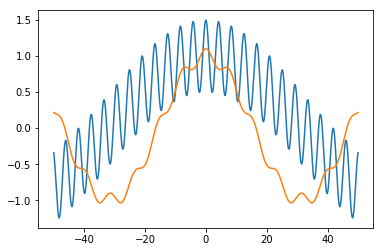

In [3]:
plt.plot(x_test, y_test_1)
plt.plot(x_test, y_test_2)

In [33]:
x = x_test
y = np.concatenate([y_test_1[None, :], y_test_2[None, :]], axis=0)
y_bg = rolling_circle_filter(x, y, radius_x=5., radius_y=0.1)

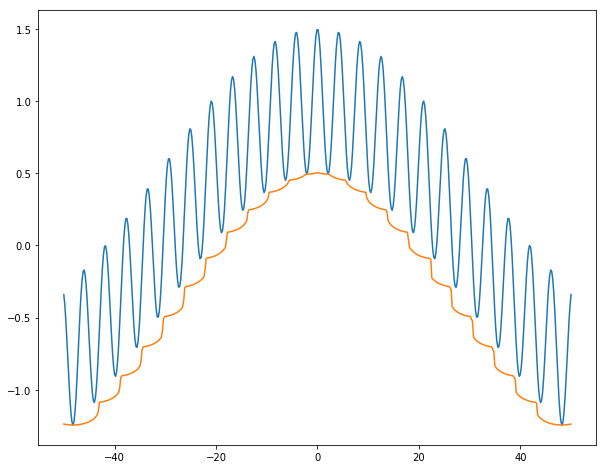

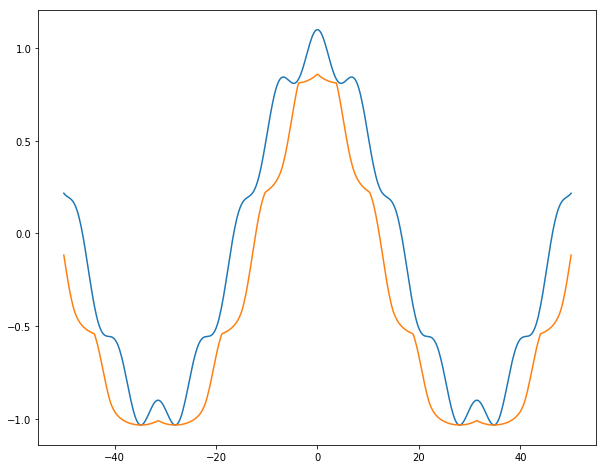

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(x, y[0, :])
ax.plot(x, y_bg[0, :])

fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(x, y[1, :])
ax.plot(x, y_bg[1, :])

# idx = 50
# circle = plt.Circle((x[idx], y_bg[1, idx] - radius), radius, color='r')
# ax.add_artist(circle)
# ax.set_aspect('equal')

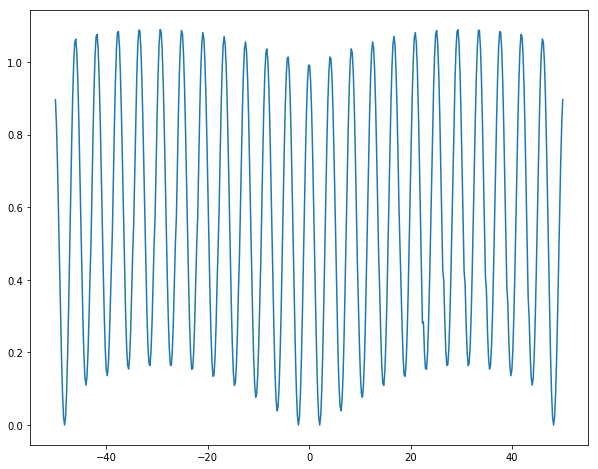

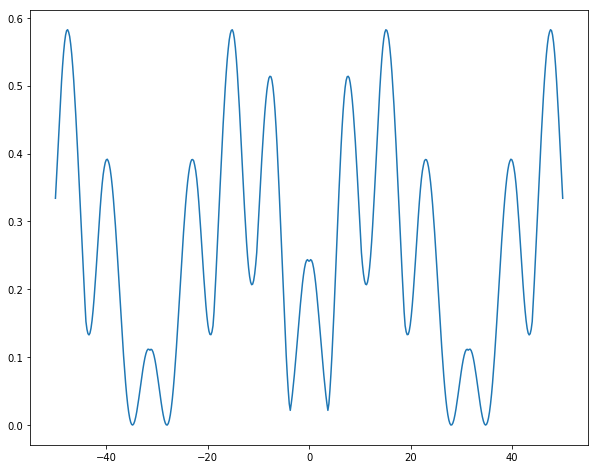

In [35]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(x, y[0, :] - y_bg[0, :])

fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(x, y[1, :] - y_bg[1, :])

# idx = 50
# circle = plt.Circle((x[idx], y_bg[1, idx] - radius), radius, color='r')
# ax.add_artist(circle)
# ax.set_aspect('equal')